In [2]:
import numpy as np
import scipy.io
import xarray as xr
import os
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from data_loading import get_altimetry_data, get_2021_CTD_data

## Altimetry data

In [3]:
# Example : january 2018

ds = get_altimetry_data([2018],[1])
ds

Loading data from data/MOOSE-Altimetry/2018/01...
Done!


<xarray.Dataset>
Dimensions:    (time: 31, latitude: 128, nv: 2, longitude: 344)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-23 2018-01-11 ... 2018-01-16
  * latitude   (latitude) float32 30.06 30.19 30.31 30.44 ... 45.69 45.81 45.94
  * longitude  (longitude) float32 -5.938 -5.812 -5.688 ... 36.69 36.81 36.94
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    lat_bnds   (time, latitude, nv) float32 30.0 30.12 30.12 ... 45.88 46.0
    lon_bnds   (time, longitude, nv) float32 -6.0 -5.875 -5.875 ... 36.88 37.0
    err        (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    adt        (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    ugos       (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    vgos       (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    sla        (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    ugosa      (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    vgosa      (time, latitude, longitude) float64 nan nan nan ... nan nan nan
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2018-01-23T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2018-01-23T00:00:00Z
    title:                           DT merged all satellites Mediterranean S...

/opt/anaconda3/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


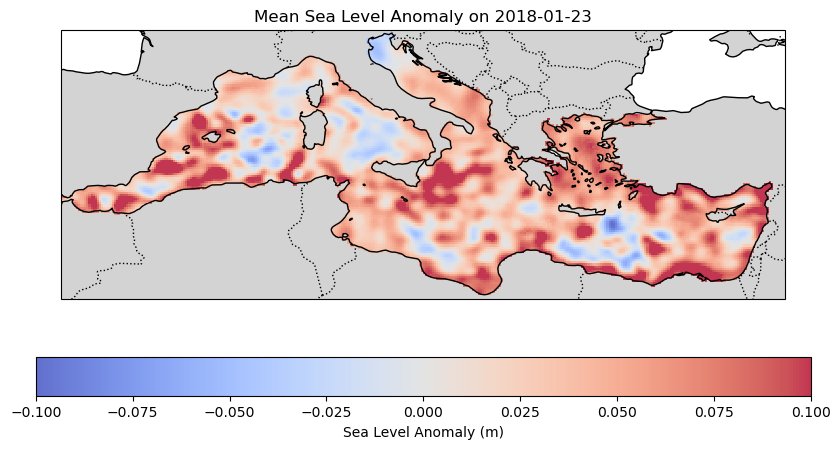

In [4]:
# Mean sea level anomaly

day = '2018-01-23'
sea_level_anomaly_map = ds['sla'].sel(time=day)
max_val = np.abs(sea_level_anomaly_map.values).max()

# Plotting the mean sea level anomaly

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
colormesh = ax.pcolormesh(
    sea_level_anomaly_map.longitude, 
    sea_level_anomaly_map.latitude, 
    sea_level_anomaly_map, 
    transform=ccrs.PlateCarree(), 
    vmin=-max_val,
    vmax=max_val,
    cmap='coolwarm',
    alpha=0.8
)
plt.colorbar(colormesh, ax=ax, orientation='horizontal', label='Sea Level Anomaly (m)')
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
#ax.add_feature(cfeature.OCEAN)
plt.title(f'Mean Sea Level Anomaly on {day}')
plt.show()


##  CTD and ADCP profiles

### 2021 profiles

In [5]:
ds = get_2021_CTD_data()
ds


/Users/juliencollard/Nextcloud/Documents/Travail/Sorbonne/Cours/Code MOCIS/FOET/FOET_Northern_Gyre/data_loading.py:68: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds = xr.Dataset(
/Users/juliencollard/Nextcloud/Documents/Travail/Sorbonne/Cours/Code MOCIS/FOET/FOET_Northern_Gyre/data_loading.py:68: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond

<xarray.Dataset>
Dimensions:      (idx: 136, depth: 2901)
Coordinates:
  * idx          (idx) int64 0 1 2 3 4 5 6 7 ... 128 129 130 131 132 133 134 135
  * depth        (depth) float64 -0.0 -0.9921 -1.984 ... -2.856e+03 -2.857e+03
    lat          (idx) float64 5.629 5.582 5.517 5.448 ... 5.198 5.2 5.2 5.194
    lon          (idx) float64 42.95 42.65 42.5 42.26 ... 42.86 42.95 43.03
    date         (idx) datetime64[ns] 2021-06-09 2021-06-09 ... 2021-07-02
    file_name    (idx) object 'moose2021_ge_leg1_001.cnv' ... 'moose2021_ge_l...
Data variables:
    temperature  (idx, depth) float64 nan nan 19.99 20.11 ... nan nan nan nan
    salinity     (idx, depth) float64 nan nan 37.97 37.97 ... nan nan nan nan

/opt/anaconda3/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


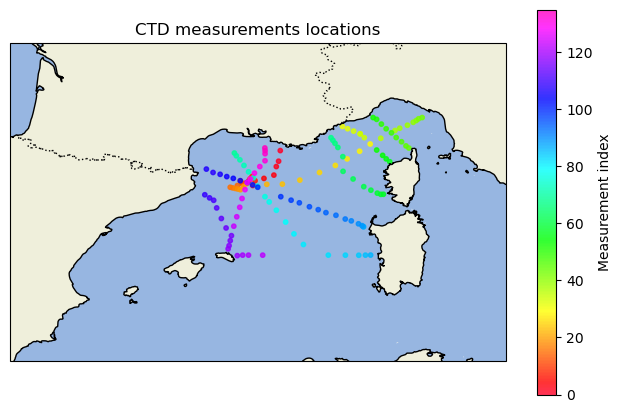

In [8]:
# Map of measurements locations
fig, ax = plt.subplots(figsize=(8,5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-2, 12, 37, 46])
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
sc = ax.scatter(ds.lat, ds.lon, s=10, c=ds.idx, cmap='gist_rainbow', alpha=0.8)
plt.colorbar(sc, ax=ax, label='Measurement index')
plt.title('CTD measurements locations')
plt.show()

## T-S profiles on 5 random locations

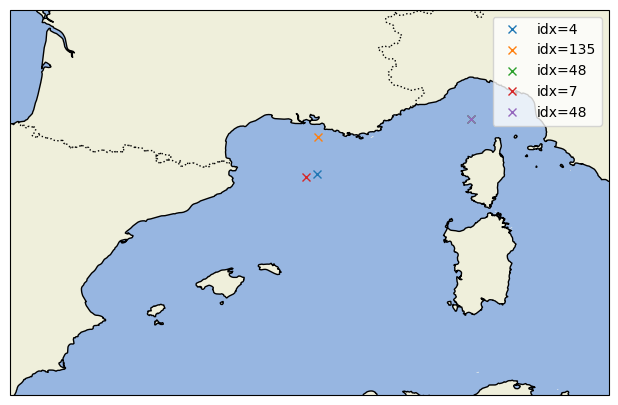

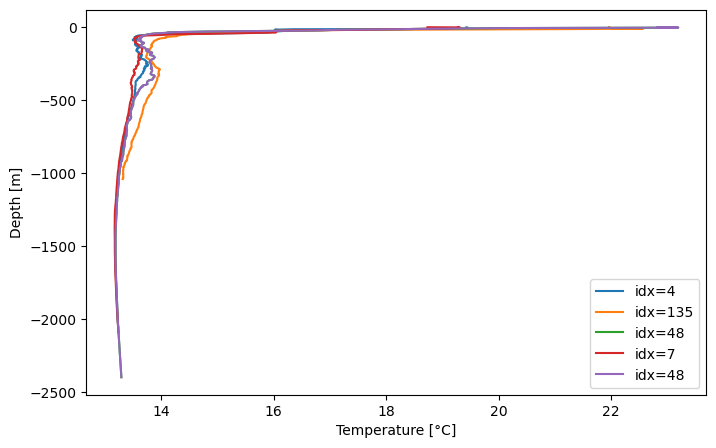

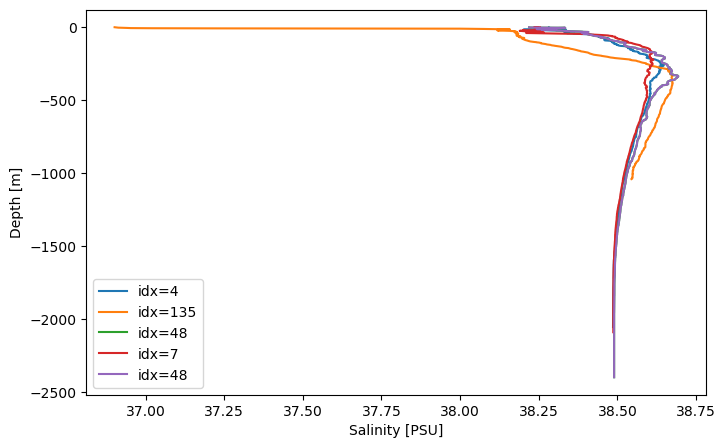

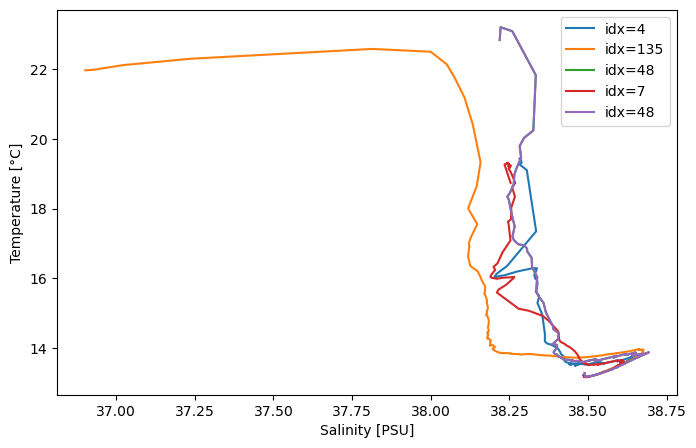

In [6]:
idxs = [np.random.choice(ds.idx.values) for i in range(5)]

# Map of measurements locations
fig, ax = plt.subplots(figsize=(8,5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-2, 12, 37, 46])
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN)
for idx in idxs:
    lat = ds.sel(idx=idx).lat
    lon = ds.sel(idx=idx).lon
    ax.plot(lat, lon, 'x', label=f'idx={idx}')
plt.legend()
plt.show()



# Temperature profiles
fig, ax = plt.subplots(figsize=(8,5))
for idx in idxs:
    ax.plot(ds.sel(idx=idx)['temperature'], ds.sel(idx=idx)['depth'], label=f'idx={idx}')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Temperature [°C]')
ax.legend()
plt.show()

# Salinity profiles
fig, ax = plt.subplots(figsize=(8,5))
for idx in idxs:
    ax.plot(ds.sel(idx=idx)['salinity'], ds.sel(idx=idx)['depth'], label=f'idx={idx}')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Salinity [PSU]')
ax.legend()
plt.show()

# TS diagram
fig, ax = plt.subplots(figsize=(8,5))
for idx in idxs:
    ax.plot(ds.sel(idx=idx)['salinity'], ds.sel(idx=idx)['temperature'], label=f'idx={idx}')
ax.set_ylabel('Temperature [°C]')
ax.set_xlabel('Salinity [PSU]')
ax.legend()
plt.show()


